In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Data Cleaning

In [2]:
r=pd.read_excel('Online Retail.xlsx')
r.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
r.shape

(541909, 8)

In [4]:
r.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [5]:
r.dropna(subset=['CustomerID'],inplace=True)

In [6]:
r.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [7]:
r=r.drop_duplicates()
r.duplicated().sum()

0

In [8]:
r.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
r.describe()

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
r=r[(r['Quantity']>0)&(r['UnitPrice']>0)]

In [11]:
r.describe()

,Quantity,UnitPrice,CustomerID
count,392692.000000,392692.000000,392692.000000
mean,13.119702,3.125914,15287.843865
std,180.492832,22.241836,1713.539549
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13955.000000
50%,6.000000,1.950000,15150.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,8142.750000,18287.000000


In [12]:
r.shape

(392692, 8)

Customer Retension Rate

In [13]:
def gm(d):
    return dt.datetime(d.year,d.month,1)

In [14]:
r['InvoiceMonth']=r['InvoiceDate'].apply(gm)

In [15]:
g=r.groupby('CustomerID')['InvoiceMonth']
r['CohortMonth']=g.transform('min')
r.sample(n=5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth
367390,568894,21509,COWBOYS AND INDIANS BIRTHDAY CARD,12,2011-09-29 13:04:00,0.42,17528.0,United Kingdom,2011-09-01,2011-09-01
334520,566258,22113,GREY HEART HOT WATER BOTTLE,1,2011-09-11 12:45:00,4.25,13124.0,United Kingdom,2011-09-01,2010-12-01
254109,559293,22739,RIBBON REEL CHRISTMAS SOCK BAUBLE,1,2011-07-07 12:29:00,1.65,16743.0,United Kingdom,2011-07-01,2010-12-01
126347,547072,20679,EDWARDIAN PARASOL RED,3,2011-03-20 14:01:00,5.95,13592.0,United Kingdom,2011-03-01,2011-03-01
28681,538652,20826,SILVER APERITIF GLASS,6,2010-12-13 15:12:00,2.12,17890.0,United Kingdom,2010-12-01,2010-12-01


In [16]:
def gmn(d,c):
    y=d[c].dt.year
    m=d[c].dt.month
    a=d[c].dt.day
    return y,m,a

In [17]:
iy,im,_=gmn(r,'InvoiceMonth')
cy,cm,_=gmn(r,'CohortMonth')

In [18]:
yd = iy-cy
md = im-cm
r['CohortIndex']=yd*12+md+1

In [19]:
gd=r.groupby(['CohortMonth','CohortIndex'])
cd=gd['CustomerID'].apply(pd.Series.nunique)

In [20]:
cd=cd.reset_index()
cc=cd.pivot(index='CohortMonth',columns='CohortIndex',values='CustomerID')
cc

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,885.0,324.0,286.0,340.0,321.0,352.0,321.0,309.0,313.0,350.0,331.0,445.0,235.0
2011-01-01,417.0,92.0,111.0,96.0,134.0,120.0,103.0,101.0,125.0,136.0,152.0,49.0,NaN
2011-02-01,380.0,71.0,71.0,108.0,103.0,94.0,96.0,106.0,94.0,116.0,26.0,NaN,NaN
2011-03-01,452.0,68.0,114.0,90.0,101.0,76.0,121.0,104.0,126.0,39.0,NaN,NaN,NaN
2011-04-01,300.0,64.0,61.0,63.0,59.0,68.0,65.0,78.0,22.0,NaN,NaN,NaN,NaN
2011-05-01,284.0,54.0,49.0,49.0,59.0,66.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,242.0,42.0,38.0,64.0,56.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,188.0,34.0,39.0,42.0,51.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,169.0,35.0,42.0,41.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
cs=cc.iloc[:,0]

In [22]:
rrd=cc.divide(cs,axis=0)
rrd.round(4)*100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
CohortMonth,,,,,,,,,,,,,
2010-12-01,100.0,36.61,32.32,38.42,36.27,39.77,36.27,34.92,35.37,39.55,37.40,50.28,26.55
2011-01-01,100.0,22.06,26.62,23.02,32.13,28.78,24.70,24.22,29.98,32.61,36.45,11.75,NaN
2011-02-01,100.0,18.68,18.68,28.42,27.11,24.74,25.26,27.89,24.74,30.53,6.84,NaN,NaN
2011-03-01,100.0,15.04,25.22,19.91,22.35,16.81,26.77,23.01,27.88,8.63,NaN,NaN,NaN
2011-04-01,100.0,21.33,20.33,21.00,19.67,22.67,21.67,26.00,7.33,NaN,NaN,NaN,NaN
2011-05-01,100.0,19.01,17.25,17.25,20.77,23.24,26.41,9.51,NaN,NaN,NaN,NaN,NaN
2011-06-01,100.0,17.36,15.70,26.45,23.14,33.47,9.50,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,100.0,18.09,20.74,22.34,27.13,11.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,100.0,20.71,24.85,24.26,12.43,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'retention rate table'}, xlabel='CohortIndex', ylabel='CohortMonth'>

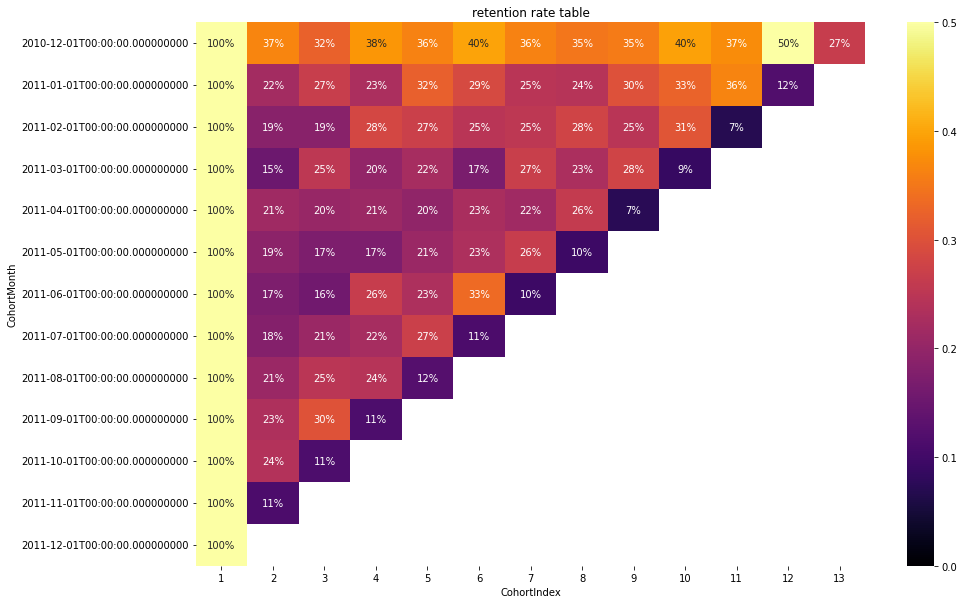

In [23]:
plt.figure(figsize=(15,10))
plt.title('retention rate table')
sns.heatmap(data=rrd,annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='inferno')

In [24]:
gad=r.groupby(['CohortMonth','CohortIndex'])
cd = gad['Quantity'].mean()
cd = cd.reset_index()
aq = cd.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
aq.round(1)
aq.index = aq.index.date

<AxesSubplot:title={'center':'Average quantity'}, xlabel='CohortIndex'>

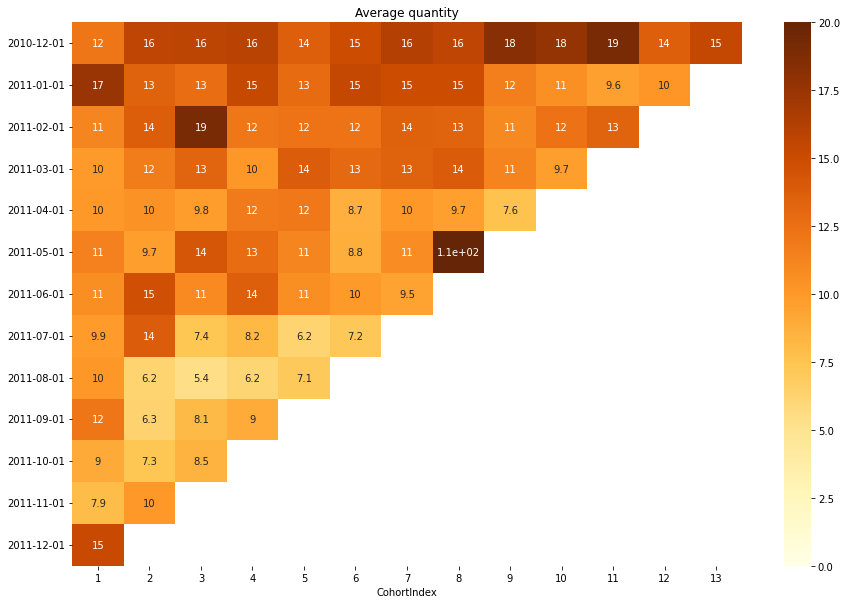

In [25]:
plt.figure(figsize=(15, 10))
plt.title('Average quantity')
sns.heatmap(data=aq,annot = True,vmin = 0.0,vmax =20,cmap='YlOrBr')

Data Modelling

In [26]:
r['TotalSum']=r['UnitPrice']*r['Quantity']

In [27]:
r.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,CohortMonth,CohortIndex,TotalSum
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,2010-12-01,1,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,2010-12-01,1,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,2010-12-01,1,20.34


In [28]:
ssd=r['InvoiceDate'].max()+dt.timedelta(days=1)
ssd

Timestamp('2011-12-10 12:50:00')

In [29]:
rfm = r.groupby(['CustomerID']).agg({'InvoiceDate':lambda x : (ssd-x.max()).days,
                                     'InvoiceNo':'count','TotalSum': 'sum'})

In [30]:
rfm.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalSum':'MonetaryValue'},
          inplace=True)

In [31]:
rfm.sample(n=5)

,Recency,Frequency,MonetaryValue
CustomerID,,,
14333.0,68,15,415.20
15216.0,88,2,96.60
16739.0,177,13,323.00
15163.0,18,29,304.47
18081.0,36,17,343.45


In [32]:
rl=range(4,0,-1)
fl=range(1,5)
ml=range(1,5)

In [33]:
rq = pd.qcut(rfm['Recency'], q=4, labels = rl)
fq = pd.qcut(rfm['Frequency'],q=4, labels = fl)
mq = pd.qcut(rfm['MonetaryValue'],q=4,labels = ml)

In [34]:
rfm = rfm.assign(R=rq,F=fq,M=mq)

In [35]:
def arfm(d):
    return str(int(d['R']))+str(int(d['F']))+str(int(d['M']))

In [36]:
rfm['RFMsegment']=rfm.apply(arfm,axis=1)

In [37]:
rfm['RFMscore']=rfm[['R','F','M']].sum(axis=1)

In [38]:
rfm.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMsegment,RFMscore
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,4,114,6
12347.0,2,182,4310.00,4,4,4,444,12
12348.0,75,31,1797.24,2,2,4,224,8
12349.0,19,73,1757.55,3,3,4,334,10
12350.0,310,17,334.40,1,1,2,112,4


In [39]:
rfm.groupby(['RFMsegment']).size().sort_values(ascending=False)[:5]

RFMsegment
444    450
111    381
344    217
122    206
211    179
dtype: int64

In [40]:
rfm[rfm['RFMsegment']=='111'].head()

,Recency,Frequency,MonetaryValue,R,F,M,RFMsegment,RFMscore
CustomerID,,,,,,,,
12353.0,204,4,89.00,1,1,1,111,3
12361.0,287,10,189.90,1,1,1,111,3
12401.0,303,5,84.30,1,1,1,111,3
12402.0,323,11,225.60,1,1,1,111,3
12441.0,367,11,173.55,1,1,1,111,3


In [41]:
rfm.groupby('RFMscore').agg({'Recency':'mean','Frequency':'mean','MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
            mean      mean          mean count
RFMscore                                      
3          260.7       8.2         157.4   381
4          177.2      13.6         240.0   388
5          152.9      21.2         366.6   518
6           95.9      27.9         820.8   457
7           79.6      38.0         758.1   463
8           64.1      56.0         987.3   454
9           45.9      78.7        1795.1   414
10          32.4     110.5        2056.4   426
11          21.3     186.9        4062.0   387
12           7.2     367.8        9285.9   450

In [42]:
def sd(d):
    if d['RFMscore']>9:
        return 'gold'
    elif (d['RFMscore']>5) and (d['RFMscore']<=9):
        return 'silver'
    else:
        return 'bronze'

In [43]:
rfm['GeneralSegment']=rfm.apply(sd,axis=1)
rfm.groupby('GeneralSegment').agg({'Recency':'mean','Frequency':'mean',
                                  'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue      
                  mean      mean          mean count
GeneralSegment                                      
bronze           192.2      15.1         266.5  1287
gold              20.1     225.6        5246.8  1263
silver            72.0      49.4        1072.4  1788

Data Analytics

In [55]:
rfmd=rfm[['Recency','Frequency','MonetaryValue']]
rfmd.describe()

,Recency,Frequency,MonetaryValue
count,4338.000000,4338.000000,4338.000000
mean,92.536422,90.523744,2048.688081
std,100.014169,225.506968,8985.230220
min,1.000000,1.000000,3.750000
25%,18.000000,17.000000,306.482500
50%,51.000000,41.000000,668.570000
75%,142.000000,98.000000,1660.597500
max,374.000000,7676.000000,280206.020000


C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

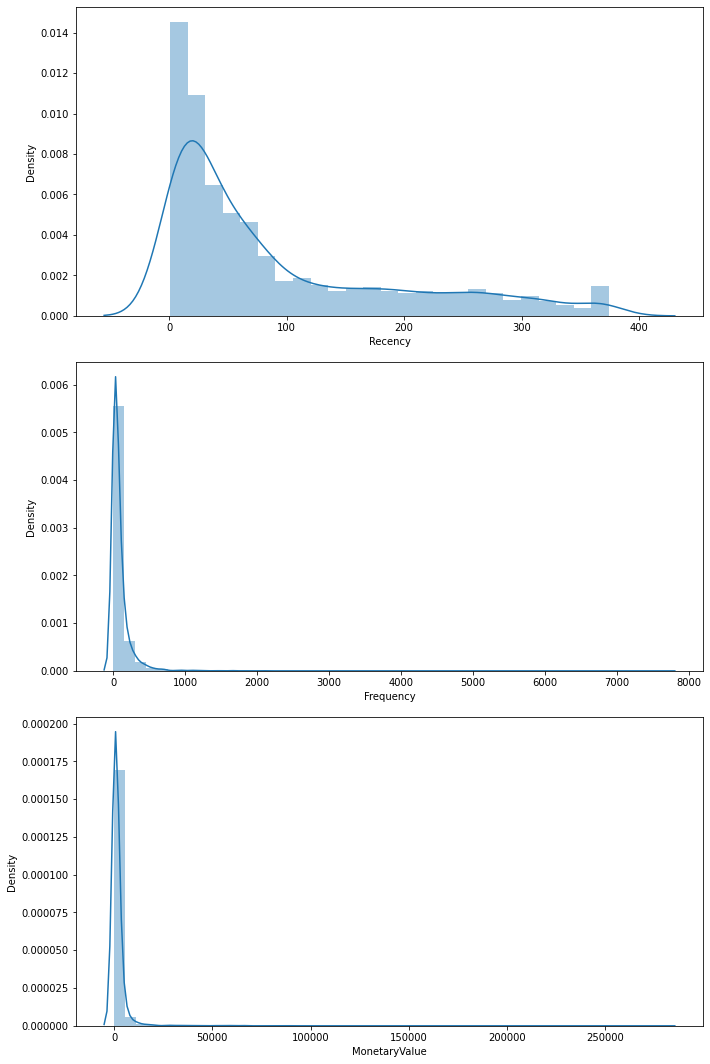

In [45]:
f,ax = plt.subplots(figsize=(10, 15))
plt.subplot(3, 1, 1); sns.distplot(rfm.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfm.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfm.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')
plt.tight_layout()

C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sriha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use eith

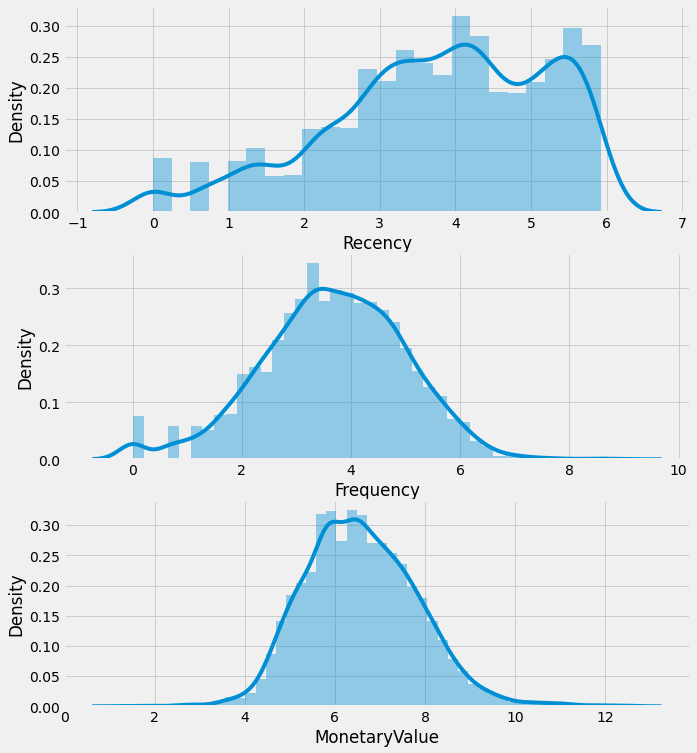

In [46]:
rfmLog = rfm[['Recency', 'Frequency', 'MonetaryValue']].apply(np.log, axis = 1).round(3)

f,ax = plt.subplots(figsize=(10, 12))
plt.subplot(3, 1, 1); sns.distplot(rfmLog.Recency, label = 'Recency')
plt.subplot(3, 1, 2); sns.distplot(rfmLog.Frequency, label = 'Frequency')
plt.subplot(3, 1, 3); sns.distplot(rfmLog.MonetaryValue, label = 'Monetary Value')
plt.style.use('fivethirtyeight')

K Means Clustering

In [47]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit(rfmLog)

StandardScaler()

In [48]:
rfmn=s.transform(rfmLog)

In [49]:
from sklearn.cluster import KMeans

In [50]:
ks = range(1,8)
i=[]
for k in ks :
    kc = KMeans(n_clusters=k,random_state=1)
    kc.fit(rfmn)
    i.append(kc.inertia_)

Text(0.5, 1.0, 'What is the Best Number for KMeans ?')

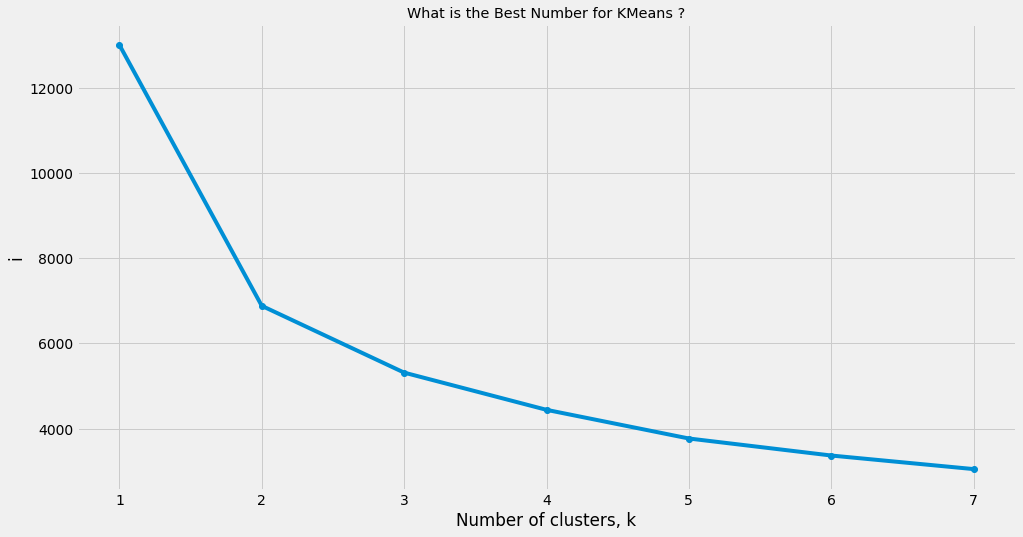

In [51]:
f, ax = plt.subplots(figsize=(15, 8))
plt.plot(ks, i, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('i')
plt.xticks(ks)
plt.style.use('ggplot')
plt.title('What is the Best Number for KMeans ?')

In [52]:
kc = KMeans(n_clusters= 3, random_state=1)
kc.fit(rfmn)

KMeans(n_clusters=3, random_state=1)

In [53]:
cl=kc.labels_

In [56]:
rfmdk=rfmd.assign(K_Cluster=cl)

In [57]:
rfmdk.groupby('K_Cluster').agg({'Recency': 'mean','Frequency': 'mean',
                                         'MonetaryValue': ['mean', 'count'],}).round(0)

Recency Frequency MonetaryValue      
             mean      mean          mean count
K_Cluster                                      
0           171.0      15.0         293.0  1523
1            69.0      65.0        1167.0  1859
2            13.0     260.0        6559.0   956

In [60]:
rfmn= pd.DataFrame(rfmn,index=rfmd.index,columns=rfmd.columns)
rfmn['K_Cluster'] = kc.labels_
rfmn['GeneralSegment'] = rfm['GeneralSegment']
rfmn.reset_index(inplace = True)

In [62]:
rfmsd = pd.melt(rfmn,id_vars=['CustomerID','GeneralSegment','K_Cluster'],value_vars=['Recency', 'Frequency', 'MonetaryValue'],
var_name='Metric',value_name='Value')
rfmsd.head()

,CustomerID,GeneralSegment,K_Cluster,Metric,Value
0,12346.0,silver,1,Recency,1.409982
1,12347.0,gold,2,Recency,-2.146578
2,12348.0,silver,1,Recency,0.383648
3,12349.0,gold,1,Recency,-0.574961
4,12350.0,bronze,0,Recency,1.375072


Text(0.5, 0.98, 'Snake Plot of RFM')

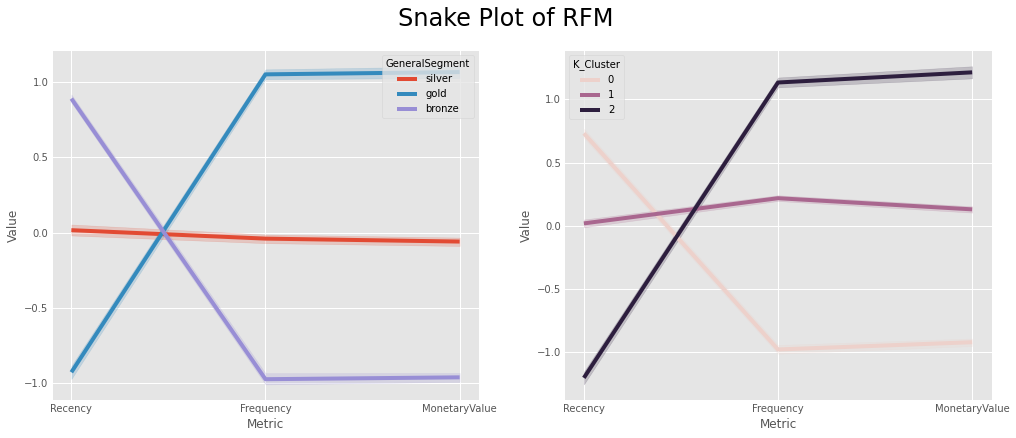

In [65]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 6))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'GeneralSegment', data = rfmsd,ax=ax1)
sns.lineplot(x = 'Metric', y = 'Value', hue = 'K_Cluster', data = rfmsd,ax=ax2)
plt.suptitle("Snake Plot of RFM",fontsize=24)

In [67]:
clusterAvg = rfmdk.groupby(['K_Cluster']).mean()
populationAvg = rfmd.mean()
relativeImp = clusterAvg / populationAvg - 1
relativeImp.round(4)

,Recency,Frequency,MonetaryValue
K_Cluster,,,
0,0.8501,-0.8353,-0.8568
1,-0.2550,-0.2780,-0.4302
2,-0.8584,1.8714,2.2015


In [68]:
totalAvg = rfm.iloc[:, 0:3].mean()
clusterAvg = rfm.groupby('GeneralSegment').mean().iloc[:, 0:3]
propRFM = clusterAvg/totalAvg - 1
propRFM.round(4)

,Recency,Frequency,MonetaryValue
GeneralSegment,,,
bronze,1.0766,-0.8336,-0.8699
gold,-0.7833,1.4924,1.5610
silver,-0.2217,-0.4541,-0.4765


Text(0.5, 0.98, 'Heat Map of RFM')

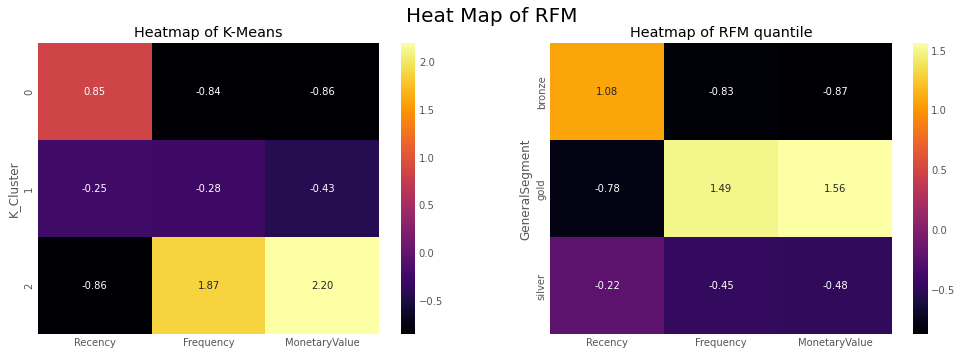

In [72]:
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 5))
sns.heatmap(data=relativeImp, annot=True, fmt='.2f', cmap='inferno',ax=ax1)
ax1.set(title = "Heatmap of K-Means")
sns.heatmap(data=propRFM, annot = True, fmt= '.2f',cmap='inferno',ax=ax2)
ax2.set(title = "Heatmap of RFM quantile")
plt.suptitle("Heat Map of RFM",fontsize=20)